## Penjelasan Dataset yang digunakan

In [57]:
# 1. Kasus yang diambil:
# Kasus yang diangkat pada penelitian ini adalah deteksi pesan email yang tergolong spam atau bukan spam (ham).
# Tujuannya adalah untuk mengklasifikasikan pesan berdasarkan isi teks menggunakan dua algoritma pembelajaran mesin,
# yaitu Naive Bayes dan Logistic Regression.

# - Naive Bayes dipilih karena merupakan algoritma berbasis probabilistik yang sederhana, cepat,
#   dan sangat efektif untuk klasifikasi teks seperti spam detection.

# - Logistic Regression digunakan sebagai model pembanding karena memiliki kemampuan yang baik
#   dalam memisahkan dua kelas dan sering menjadi baseline kuat dalam permasalahan klasifikasi biner.

# Kedua model ini akan dibandingkan berdasarkan akurasi dan hasil prediksi untuk menentukan
# algoritma mana yang memberikan performa terbaik dalam mendeteksi pesan spam.

In [ ]:
# 2. Penjelasan setiap kolom:
# Dataset memiliki dua kolom utama:
# - v1 : label pesan, berisi kategori pesan yaitu 'ham' (bukan spam) dan 'spam' (pesan iklan/penipuan).
# - v2 : isi pesan dalam bentuk teks (SMS) yang akan dianalisis.
# Setelah proses load data, kolom 'v1' dan 'v2' akan diubah menjadi:
#   label = v1
#   text  = v2
# Kolom 'label' digunakan sebagai target klasifikasi,
# sedangkan kolom 'text' merupakan data teks yang akan diproses dan dianalisis.

In [ ]:
# 3. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Menampilkan jumlah data
print("Jumlah data:", len(df))
df.head()

Jumlah data: 5572


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Understanding

In [ ]:
# 1. Mengecek jumlah baris dan kolom
print("Jumlah baris dan kolom:", df.shape)

df.head()

Jumlah baris dan kolom: (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# 2. Panjang Rata-rata Setiap Pesan

df['length'] = df['v2'].apply(len)

# Menampilkan rata-rata panjang pesan
rata_rata_panjang = df['length'].mean()
print("Panjang rata-rata setiap pesan:", round(rata_rata_panjang, 2))


Panjang rata-rata setiap pesan: 80.12


In [ ]:
# 3 Cek Data Duplikasi

duplikasi = df.duplicated().sum()
print("Jumlah data duplikat:", duplikasi)

if duplikasi > 0:
    print("\nContoh data duplikat:")
    display(df[df.duplicated()])


Jumlah data duplikat: 403

Contoh data duplikat:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
102,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN,160
153,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN,160
206,ham,"As I entered my cabin my PA said, '' Happy B'd...",NaN,NaN,NaN,156
222,ham,"Sorry, I'll call later",NaN,NaN,NaN,22
325,ham,No calls..messages..missed calls,NaN,NaN,NaN,32
...,...,...,...,...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...,NaN,NaN,NaN,153
5535,ham,"I know you are thinkin malaria. But relax, chi...",NaN,NaN,NaN,329
5539,ham,Just sleeping..and surfing,NaN,NaN,NaN,26
5553,ham,Hahaha..use your brain dear,NaN,NaN,NaN,27


In [ ]:
# 4 Cek Data Kosong (Missing Values)

# Mengecek jumlah nilai kosong di setiap kolom
print("Jumlah data kosong di setiap kolom:")
print(df.isnull().sum())

# Mengecek total data kosong di seluruh dataset
total_null = df.isnull().sum().sum()
print("\nTotal nilai kosong di seluruh dataset:", total_null)

Jumlah data kosong di setiap kolom:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
length           0
dtype: int64

Total nilai kosong di seluruh dataset: 16648


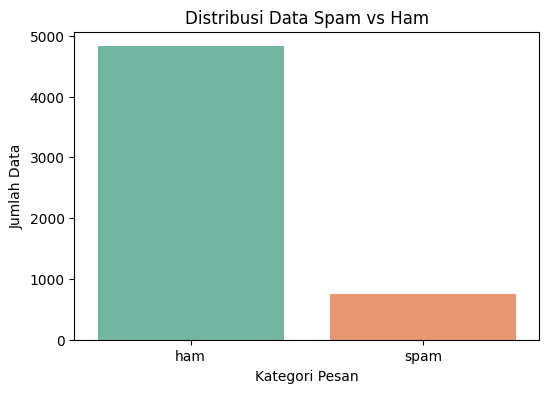

In [ ]:
# 5. Distribusi Data Menggunakan Bar Chart
plt.figure(figsize=(6,4))
sns.countplot(x='v1', data=df, hue='v1', palette='Set2', legend=False)

plt.title('Distribusi Data Spam vs Ham')
plt.xlabel('Kategori Pesan')
plt.ylabel('Jumlah Data')
plt.show()


In [ ]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], errors='ignore')

In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.dropna()

In [53]:
df = df.rename(columns={'v1': 'Category', 'v2': 'Message'})

In [ ]:
print("Jumlah data setelah pembersihan:", len(df))
print("\nNama kolom setelah pembersihan:", df.columns.tolist())

df.head()

Jumlah data setelah pembersihan: 5169

Nama kolom setelah pembersihan: ['Category', 'Message', 'length']


,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61






## Data Text Processing

In [ ]:
# 1. Tokenisasi
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')

contoh_pesan = df['Message'][0]

# Tokenisasi
tokens = word_tokenize(contoh_pesan)

print("Teks asli:")
print(contoh_pesan)
print("\nHasil tokenisasi:")
print(tokens)
df['tokens'] = df['Message'].apply(word_tokenize)

df[['Message', 'tokens']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Teks asli:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Hasil tokenisasi:
['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']


,Message,tokens
0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [ ]:
# 2. Lemmatization
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()
contoh_pesan = df['Message'][0]
tokens = word_tokenize(contoh_pesan)

# Lemmatization
hasil_lemmatization = [lemmatizer.lemmatize(token) for token in tokens]

print("Teks asli:")
print(contoh_pesan)
print("\nHasil Lemmatization:")
print(hasil_lemmatization)


Teks asli:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Hasil Lemmatization:
['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# 3. Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Inisialisasi stemmer
stemmer = PorterStemmer()
contoh_pesan = df['Message'][0]
tokens = word_tokenize(contoh_pesan)

# Stemming
hasil_stemming = [stemmer.stem(token) for token in tokens]

print("Teks asli:")
print(contoh_pesan)
print("\nHasil Stemming:")
print(hasil_stemming)


Teks asli:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Hasil Stemming:
['go', 'until', 'jurong', 'point', ',', 'crazi', '..', 'avail', 'onli', 'in', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amor', 'wat', '...']


In [ ]:
# 4. Stopword Removal

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk # Pastikan Anda mengimpor nltk

stop_words = set(stopwords.words('english'))

def filter_and_tokenize(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

df['filtered_tokens'] = df['Message'].apply(filter_and_tokenize)

print("Verifikasi setelah Stopword Removal (5 baris pertama):")
print(df[['Message', 'filtered_tokens']].head())

Verifikasi setelah Stopword Removal (5 baris pertama):
                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                     filtered_tokens  
0  [go, jurong, point, crazy, available, bugis, n...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, wkly, comp, win, fa, cup, final,...  
3      [u, dun, say, early, hor, u, c, already, say]  
4  [nah, dont, think, goes, usf, lives, around, t...  


In [ ]:
df.columns

Index(['Category', 'Message', 'length', 'tokens', 'filtered_tokens'], dtype='object')

In [ ]:
# 5. Normalisasi
def normalize_text(tokens):
    normalization_dict = {
        "u": "you",
        "ur": "your",
        "r": "are",
        "4u": "for you",
        "pls": "please",
        "msg": "message",
        "im": "i am",
        "dont": "do not",
        "cant": "cannot",
        "thx": "thanks",
        "ok": "okay",
        "luv": "love"
    }
    return [normalization_dict.get(word, word) for word in tokens]

df['normalized'] = df['filtered_tokens'].apply(normalize_text)
df['normalized_text'] = df['normalized'].apply(lambda x: ' '.join(x))
df[['Message', 'normalized_text']].head()

,Message,normalized_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,okay lar joking wif you oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...
3,U dun say so early hor... U c already then say...,you dun say early hor you c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah do not think goes usf lives around though


In [ ]:
# 6. Matrix Correlation (opsional, dilewati)
# Tidak dilakukan karena fokus penelitian adalah klasifikasi teks,
# bukan analisis korelasi antar fitur.

In [56]:
# 7. Labeling Data
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()

df['Category_Encoded'] = le.fit_transform(df['Category'])
print("Data setelah Labeling (Encoding):")
print(df[['Category', 'Category_Encoded']].head())

print("\nMapping Label:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

Data setelah Labeling (Encoding):
  Category  Category_Encoded
0      ham                 0
1      ham                 0
2     spam                 1
3      ham                 0
4      ham                 0

Mapping Label:
{'ham': np.int64(0), 'spam': np.int64(1)}


In [ ]:
# 8. Text Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

X_text = df['normalized_text']
y = df['Category_Encoded']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_text)

print(f"Bentuk Matriks Fitur (X) setelah Vektorisasi: {X.shape}")
print(f"Bentuk Vektor Target (y): {y.shape}")

Bentuk Matriks Fitur (X) setelah Vektorisasi: (5169, 8078)
Bentuk Vektor Target (y): (5169,)


In [55]:
# 9. Data Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Ukuran X_train (Fitur Pelatihan): {X_train.shape}")
print(f"Ukuran X_test (Fitur Pengujian): {X_test.shape}")
print(f"Ukuran y_train (Target Pelatihan): {y_train.shape}")
print(f"Ukuran y_test (Target Pengujian): {y_test.shape}")

Ukuran X_train (Fitur Pelatihan): (4135, 8078)
Ukuran X_test (Fitur Pengujian): (1034, 8078)
Ukuran y_train (Target Pelatihan): (4135,)
Ukuran y_test (Target Pengujian): (1034,)


## Data Modeling

In [54]:
## Data Modeling

# Pada tahap ini digunakan dua model machine learning, yaitu Naive Bayes dan Logistic Regression.
# Keduanya dipilih karena efektif dan efisien dalam kasus klasifikasi teks seperti deteksi spam email.

# 1. Naive Bayes:
# Naive Bayes merupakan algoritma berbasis probabilitas yang menggunakan Teorema Bayes
# dengan asumsi independensi antar fitur. Model ini sangat cocok untuk data teks
# karena menghitung peluang kemunculan kata dalam setiap kategori (spam atau ham).

# 2. Logistic Regression:
# Logistic Regression bekerja dengan memprediksi probabilitas dari suatu kelas menggunakan fungsi sigmoid.
# Meskipun sederhana, model ini sering digunakan sebagai baseline yang kuat untuk klasifikasi teks.

Naive Bayes:

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# 1. Inisialisasi Model
model_nb = MultinomialNB()

# 2. Latih Model (Training)
model_nb.fit(X_train, y_train)

# 3. Prediksi menggunakan data testing
y_pred_nb = model_nb.predict(X_test)

print("Pelatihan Naive Bayes Selesai. Hasil prediksi disimpan di y_pred_nb.")

Pelatihan Naive Bayes Selesai. Hasil prediksi disimpan di y_pred_nb.


Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

# 1. Inisialisasi Model
model_lr = LogisticRegression(solver='liblinear', random_state=42)

# 2. Latih Model (Training)
model_lr.fit(X_train, y_train)

# 3. Prediksi menggunakan data testing
y_pred_lr = model_lr.predict(X_test)

print("Pelatihan Logistic Regression Selesai. Hasil prediksi disimpan di y_pred_lr.")

Pelatihan Logistic Regression Selesai. Hasil prediksi disimpan di y_pred_lr.


## Data Evaluasi

Data Evaluasi Naive Bayes:

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(" Data Evaluasi: Naive Bayes ")

# 1. Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("1. Confusion Matrix:")
print(conf_matrix_nb)

# 2. Laporan Klasifikasi (Classification Report)
class_report_nb = classification_report(y_test, y_pred_nb)
print("\n2. Laporan Klasifikasi (Classification Report):")
print(class_report_nb)

 Data Evaluasi: Naive Bayes 
1. Confusion Matrix:
[[903   0]
 [ 39  92]]

2. Laporan Klasifikasi (Classification Report):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       903
           1       1.00      0.70      0.83       131

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034



Data Evaluasi Logistic Regression:

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("\n Data Evaluasi: Logistic Regression ")

# 1. Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("1. Confusion Matrix:")
print(conf_matrix_lr)

# 2. Laporan Klasifikasi (Classification Report)
class_report_lr = classification_report(y_test, y_pred_lr)
print("\n2. Laporan Klasifikasi (Classification Report):")
print(class_report_lr)


 Data Evaluasi: Logistic Regression 
1. Confusion Matrix:
[[900   3]
 [ 50  81]]

2. Laporan Klasifikasi (Classification Report):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       903
           1       0.96      0.62      0.75       131

    accuracy                           0.95      1034
   macro avg       0.96      0.81      0.86      1034
weighted avg       0.95      0.95      0.94      1034



## Perbandingan Model apabila menggunakan beberapa algoritma

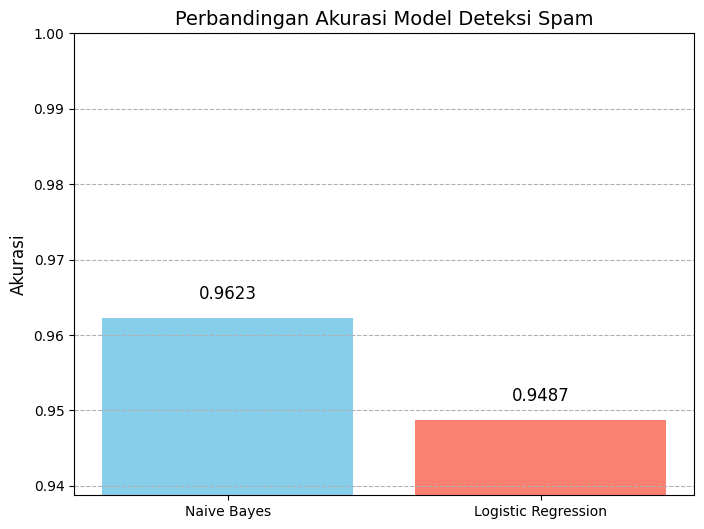


Ringkasan Akurasi:
Akurasi Naive Bayes: 0.9623
Akurasi Logistic Regression: 0.9487


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Data untuk Bar Chart
models = ['Naive Bayes', 'Logistic Regression']
accuracies = [accuracy_nb, accuracy_lr]

# Visualisasi Bar Chart
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'salmon'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002,
             f'{yval:.4f}', ha='center', va='bottom', fontsize=12)

# Mengatur Tampilan
plt.ylim(min(accuracies) - 0.01, 1.0)
plt.title('Perbandingan Akurasi Model Deteksi Spam', fontsize=14)
plt.ylabel('Akurasi', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

# Ringkasan hasil
print("\nRingkasan Akurasi:")
print(f"Akurasi Naive Bayes: {accuracy_nb:.4f}")
print(f"Akurasi Logistic Regression: {accuracy_lr:.4f}")

## Kesimpulan


Berdasarkan hasil analisis dan permodelan klasifikasi pesan spam menggunakan Naive Bayes dan Logistic Regression, dapat disimpulkan sebagai berikut:

1.  Performa Keseluruhan: Kedua model menunjukkan performa yang sangat tinggi (Akurasi NB: 0.9623; LR: 0.9487).
2.  Model Terbaik: Algoritma Naive Bayes (MNB)menunjukkan kinerja yang sedikit lebih unggul dalam hal akurasi keseluruhan.
3.  Kualitas Klasifikasi (Kritis): Keunggulan utama model Naive Bayes terletak pada metrik False Positive (FP).
    * Naive Bayes: Mencapai FP = 0. Model ini tidak pernah salah mengklasifikasikan pesan penting (Ham) sebagai Spam. Ini adalah hasil yang ideal dalam filter spam.
    * Logistic Regression: Menghasilkan FP = 3, yang menunjukkan adanya 3 pesan penting yang salah diklasifikasikan sebagai Spam.

**Kesimpulan Akhir:** Naive Bayes direkomendasikan sebagai model terbaik karena performa akurasinya yang lebih tinggi dan kemampuannya yang sempurna dalam menghindari kesalahan klasifikasi pesan penting (Ham).